In [2]:
import numpy as np
import pandas as pd
import librosa
import os

In [8]:
os.chdir('/Users/hyunwoogu/Documents/Exclamation/')
samples  = [i for i in os.listdir() if ('wav' in i) & (not i.startswith('Gamtan'))]

In [27]:
features = np.zeros([len(samples), 3*4])
labels1  = np.zeros([len(samples), 1])
labels2  = np.zeros([len(samples), 1])
Label_Keys = {'E':0, 'Su':1, 'A':2, 'D':3, 'F':4, 'Sa':5}

def MinMaxMean(array):
    Min = np.min(array)
    Max = np.max(array)
    Mean= np.mean(array)
    return(Min, Max, Mean)

In [46]:
for i in range(len(samples)):
    data, fs = librosa.load(samples[i])
    features[i, 0:3] = MinMaxMean(librosa.feature.chroma_cens(data))
    features[i, 3:6] = MinMaxMean(librosa.feature.chroma_cqt(data))
    features[i, 6:9] = MinMaxMean(librosa.feature.mfcc(data))
    features[i, 9:12]= MinMaxMean(librosa.feature.delta(data))
    
    labels1[i,0] = Label_Keys[''.join([c for c in (samples[i]).split('n')[0].split('p')[0]])]
    labels2[i,0] = 0 if 'np' in samples[i] else 1

In [50]:
colnames = []

for i in ['ChrCens', 'ChrCQT', 'MFCC', 'Delta']:
    for j in ['Min', 'Max', 'Mean']:
        colnames.append(i + j)

colnames = ['File', 'Label1', 'Label2'] + colnames

DATA = pd.DataFrame(features)
DATA.loc[:,12] = [k.split('.')[0] for k in samples]
DATA.loc[:,13] = labels1[:,0]
DATA.loc[:,14] = labels2[:,0]
DATA = DATA.loc[:, [12, 13, 14] + [i for i in range(12)]]

DATA.columns   = colnames
DATA.to_csv('records.csv', index=False)

## Visualization (ggplot2)

In [2]:
library(tidyverse)
library(gridExtra)
library(ggbiplot)

In [13]:
setwd('/Users/hyunwoogu/Documents/Exclamation/')
DATA = read.csv('records.csv')
DATA$Label1 = as.factor(DATA$Label1)
DATA$Label2 = as.factor(DATA$Label2)

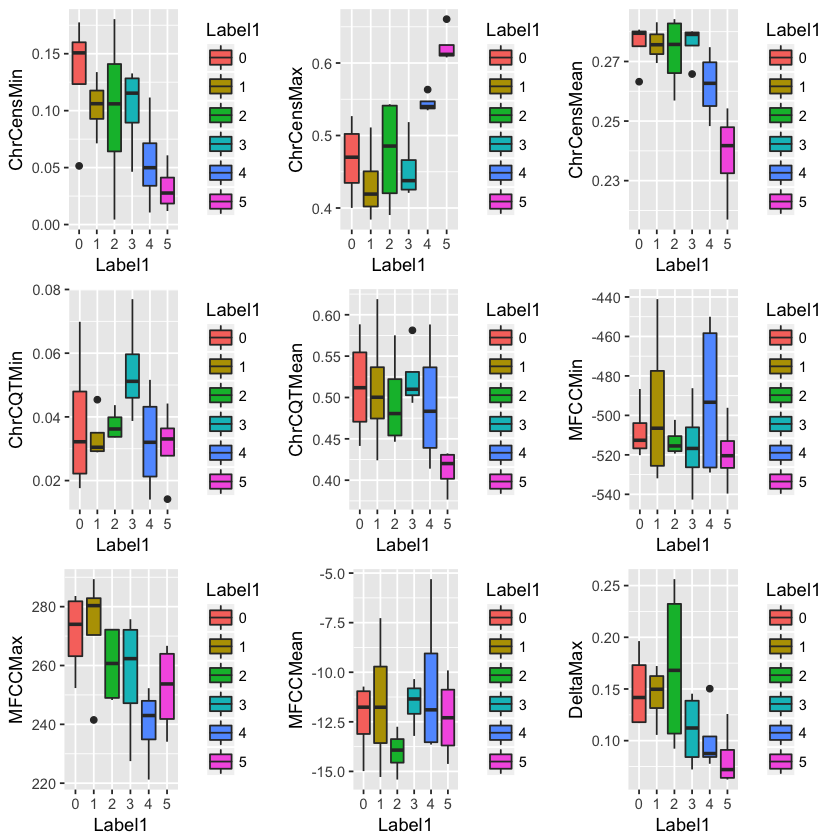

In [8]:
p1 = ggplot(DATA, aes(x=Label1, y=ChrCensMin, fill=Label1)) + geom_boxplot()
p2 = ggplot(DATA, aes(x=Label1, y=ChrCensMax, fill=Label1)) + geom_boxplot()
p3 = ggplot(DATA, aes(x=Label1, y=ChrCensMean, fill=Label1)) + geom_boxplot()
p4 = ggplot(DATA, aes(x=Label1, y=ChrCQTMin, fill=Label1)) + geom_boxplot()
p5 = ggplot(DATA, aes(x=Label1, y=ChrCQTMean, fill=Label1)) + geom_boxplot()
p6 = ggplot(DATA, aes(x=Label1, y=MFCCMin, fill=Label1)) + geom_boxplot()
p7 = ggplot(DATA, aes(x=Label1, y=MFCCMax, fill=Label1)) + geom_boxplot()
p8 = ggplot(DATA, aes(x=Label1, y=MFCCMean, fill=Label1)) + geom_boxplot()
p9 = ggplot(DATA, aes(x=Label1, y=DeltaMax, fill=Label1)) + geom_boxplot()

grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, ncol = 3, nrow =3 )

## Principal Component Analysis (prcomp)

In [10]:
DATAnumeric = DATA[,c(4:7, 9:14)]
DATAlabel1  = DATA$Label1
DATAlabel2  = DATA$Label2

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1845 1.3524 1.0358 0.98070 0.82889 0.52792 0.42282
Proportion of Variance 0.4772 0.1829 0.1073 0.09618 0.06871 0.02787 0.01788
Cumulative Proportion  0.4772 0.6601 0.7674 0.86357 0.93227 0.96014 0.97802
                           PC8     PC9    PC10
Standard deviation     0.31716 0.29084 0.18605
Proportion of Variance 0.01006 0.00846 0.00346
Cumulative Proportion  0.98808 0.99654 1.00000

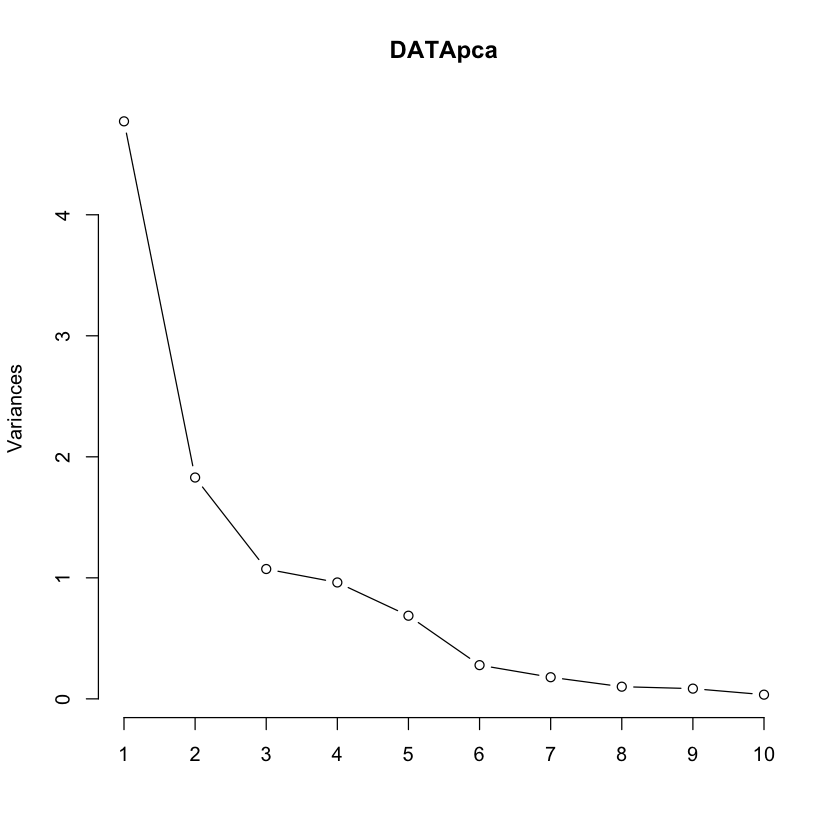

In [11]:
DATApca = prcomp(DATAnumeric, center=T, scale.=T)
plot(DATApca, type="l")
summary(DATApca)

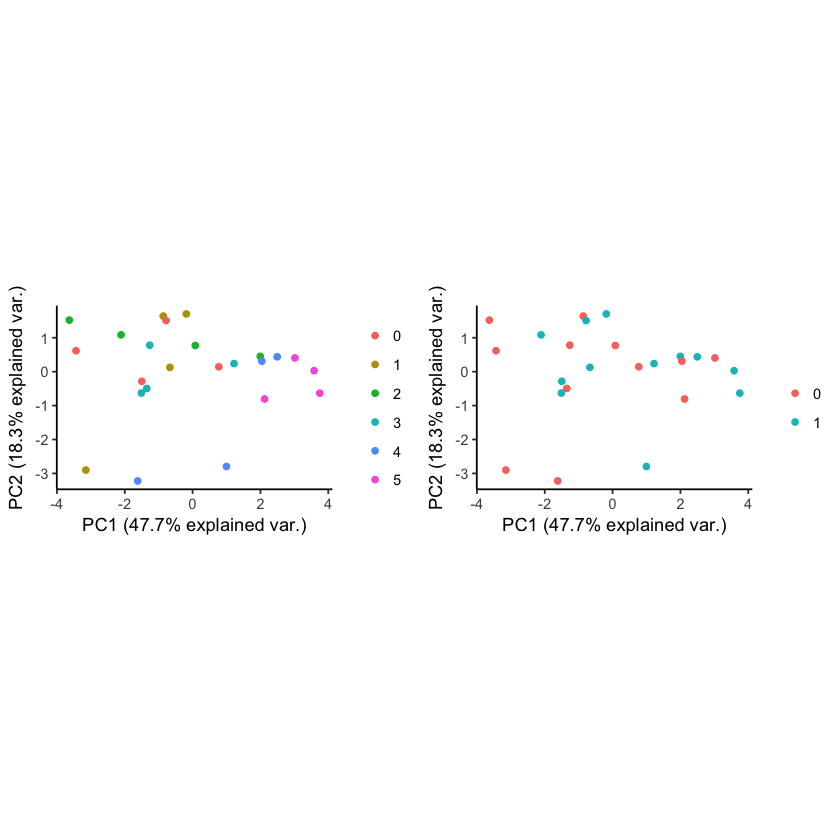

In [12]:
p1= ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATAlabel1, varname.size=0, var.axes = F) +  # circle = TRUE #  llipse = TRUE
    scale_color_discrete(name = '') +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    theme_classic()

p2 = ggbiplot(DATApca, obs.scale = 1, var.scale = 1, 
         groups = DATAlabel2, varname.size=0, var.axes = F) +  # circle = TRUE #  llipse = TRUE
    scale_color_discrete(name = '') +
    theme(legend.direction = 'horizontal', legend.position = 'top') +
    theme_classic()

grid.arrange(p1, p2, ncol = 2)